In [1]:
import keras
print(keras.__version__)

3.4.1


In [2]:
from keras.datasets import mnist

# Read MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Create a function which takes this data, splits it into train and test and tell shape of each dataset
def print_shape(x_train, y_train, x_test, y_test):
  print("x_train shape:", x_train.shape)
  print("y_train shape:", y_train.shape)
  print("x_test shape:", x_test.shape)
  print("y_test shape:", y_test.shape)

print_shape(X_train, y_train, X_test, y_test)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


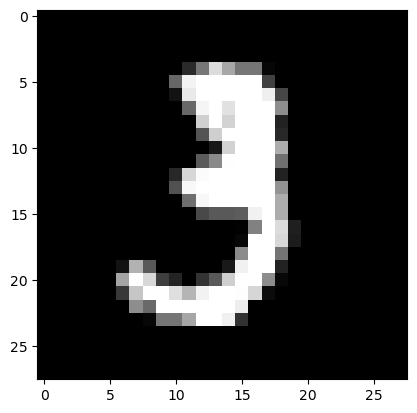

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure
plt.imshow(X_train[10],cmap='gray')
plt.show()

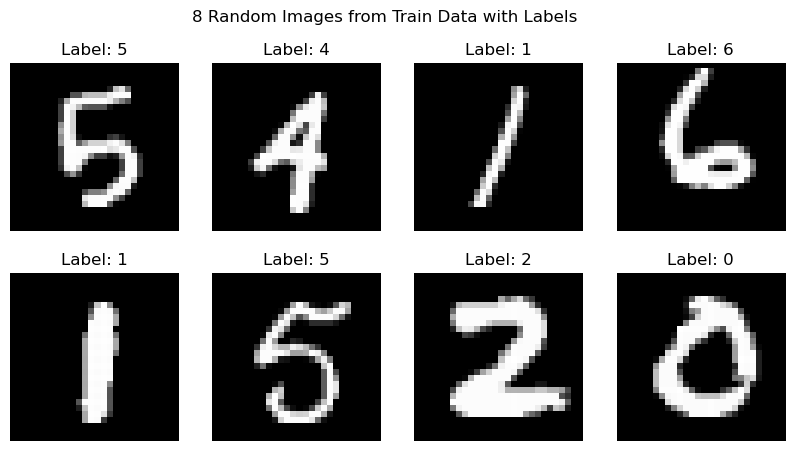

In [4]:
import random

# Select 8 random indices from the training set
random_indices = random.sample(range(len(X_train)), 8)

# Plot the images and their corresponding labels
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i, index in enumerate(random_indices):
    ax = axes[i // 4, i % 4]
    ax.imshow(X_train[index], cmap="gray")
    ax.set_title(f"Label: {y_train[index]}")
    ax.axis("off")

plt.suptitle("8 Random Images from Train Data with Labels")
plt.show()

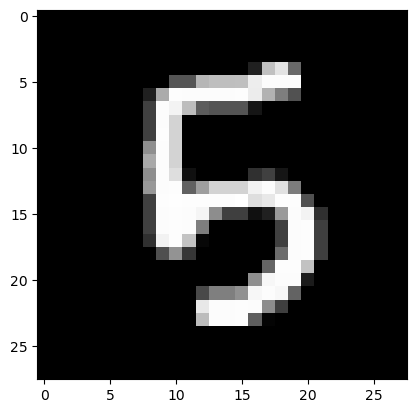

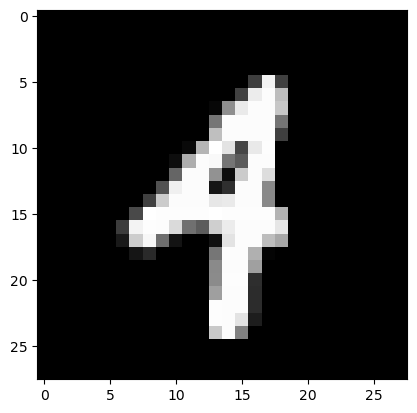

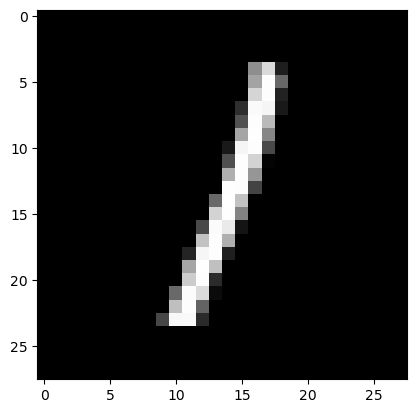

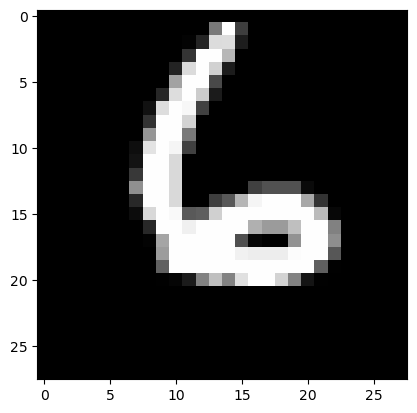

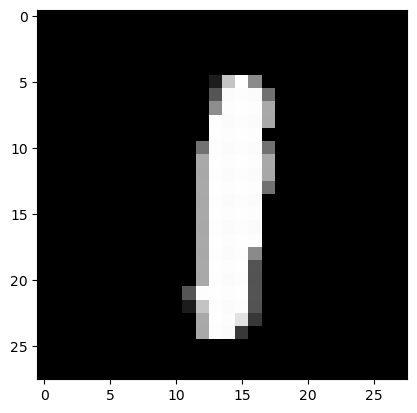

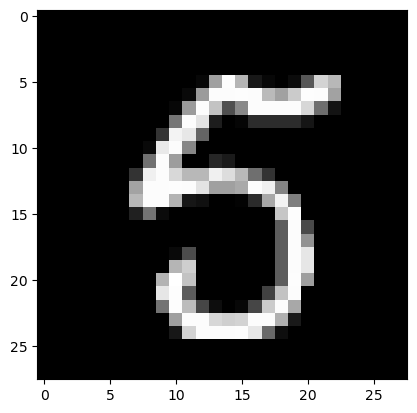

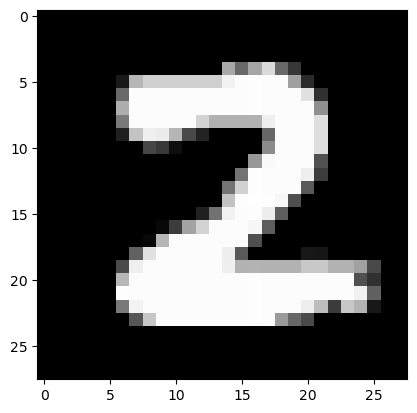

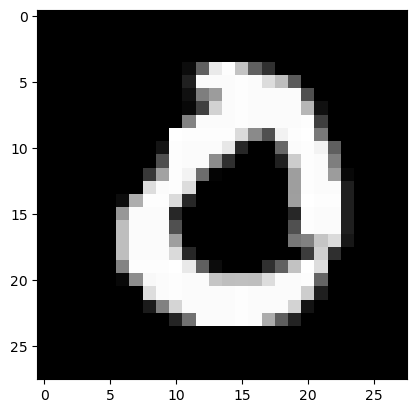

In [5]:
for i in random_indices:
  plt.imshow(X_train[i],cmap='gray')
  plt.show()

In [6]:
X_train[0].shape

(28, 28)

In [7]:
import numpy as np

In [8]:
np.max(X_train[0]),np.min(X_train[0])

(255, 0)

In [9]:
# Build a ANN model using this
# 28x28 =784
# reshape your data
# scale this data Min-Max scaling

# Model Parameters
NUM_ROWS = 28
NUM_COLS = 28

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))

#Scaling the data
X_train = X_train.astype('float32') / 255 #max scaling
X_test = X_test.astype('float32') / 255

In [10]:
np.max(X_train[0]),np.min(X_train[0])

(1.0, 0.0)

In [11]:
Create a simple Neural Network Model which has
Input Layer 3 Hidden Layers - 64,32,16 neurons & uses relu activation Output Layer ->

model.compile - Use adam optimiser, loss as per , accuracy as a metric

SyntaxError: invalid syntax (1554804867.py, line 1)

In [12]:
from keras import models
from keras.layers import Dense, Dropout

In [13]:
# Build neural network
model = models.Sequential()
model.add(Dense(64, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
y_train[2]

4

In [16]:
from keras.utils import to_categorical
# Categorically encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [17]:
# Train model
model.fit(X_train, y_train,
          batch_size=10,
          epochs=20,
          validation_data=(X_test, y_test))


Epoch 1/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8488 - loss: 0.5039 - val_accuracy: 0.9582 - val_loss: 0.1475
Epoch 2/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9595 - loss: 0.1322 - val_accuracy: 0.9658 - val_loss: 0.1111
Epoch 3/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9712 - loss: 0.0972 - val_accuracy: 0.9695 - val_loss: 0.0978
Epoch 4/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9777 - loss: 0.0743 - val_accuracy: 0.9667 - val_loss: 0.1119
Epoch 5/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9811 - loss: 0.0590 - val_accuracy: 0.9717 - val_loss: 0.0977
Epoch 6/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9832 - loss: 0.0527 - val_accuracy: 0.9709 - val_loss: 0.1170
Epoch 7/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9853 - loss: 0.0462 - val_accuracy: 0.9730 - val_loss: 0.1031
Epoch 8/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9876 - loss: 0.0

In [18]:
model = models.Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# Train model
model.fit(X_train, y_train,
          batch_size=10,
          epochs=20,
          validation_data=(X_test, y_test))

Epoch 1/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8275 - loss: 0.5548 - val_accuracy: 0.9538 - val_loss: 0.1479
Epoch 2/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9461 - loss: 0.1948 - val_accuracy: 0.9701 - val_loss: 0.1040
Epoch 3/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9581 - loss: 0.1498 - val_accuracy: 0.9723 - val_loss: 0.0992
Epoch 4/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9614 - loss: 0.1367 - val_accuracy: 0.9752 - val_loss: 0.0883
Epoch 5/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9673 - loss: 0.1146 - val_accuracy: 0.9770 - val_loss: 0.0872
Epoch 6/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9706 - loss: 0.1027 - val_accuracy: 0.9756 - val_loss: 0.0924
Epoch 7/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9716 - loss: 0.0991 - val_accuracy: 0.9777 - val_loss: 0.0809
Epoch 8/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9741 - loss: 0

# 2. How can you implement this using a CNN - 5 minutes

In [19]:
# We don't need to reshape our data
# CNNs are optimised for image input

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [20]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [27]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [28]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [29]:
del model

In [30]:
from keras import layers
model = models.Sequential(
    [
        #CNN
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),


        #bridge between CNNS and FC layers
        layers.Flatten(),

        # FC layers
        layers.Dense(16, activation="relu"),
        layers.Dense(10, activation="softmax")


    ]
)


In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │          25,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,602 (174.23 KB)

 Trainable params: 44,602 (174.23 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
model.fit(x_train, y_train, batch_size=128, epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9980 - loss: 0.0060 - val_accuracy: 0.9920 - val_loss: 0.0296
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9996 - loss: 0.0028 - val_accuracy: 0.9918 - val_loss: 0.0295
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.9915 - val_loss: 0.0310
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9998 - loss: 0.0016 - val_accuracy: 0.9917 - val_loss: 0.0313
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.9913 - val_loss: 0.0323


In [38]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03227923437952995
Test accuracy: 0.9912999868392944


In [39]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [40]:
predictions.shape

(10000, 10)

In [41]:
y_test.shape

(10000, 10)

In [42]:
predictions[0]

array([2.6355983e-12, 6.6216130e-11, 1.5295379e-10, 5.5574465e-09,
       6.0065335e-09, 1.4129920e-14, 2.1165043e-18, 1.0000000e+00,
       3.0637333e-12, 3.0348456e-08], dtype=float32)

In [43]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [49]:
np.argmax(predictions[0])

7

In [50]:
np.argmax(y_test[0])

7

In [51]:
for idx, i in enumerate(predictions[0]):
    if i== predictions[0].max():
        print(idx)

7
